In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import sklearn
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.naive_bayes import GaussianNB

# Data Input

In [3]:
i_data=pd.read_csv("iris.data")
i_data.columns=['sepal length','sepal width','petal length','petal width','class']
i_data.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# Data Visualization

In [3]:
sl_avg=np.average(i_data['sepal length'])
sw_avg=np.average(i_data['sepal width'])
pl_avg=np.average(i_data['petal length'])
pw_avg=np.average(i_data['petal width'])

sl_std=np.std(i_data['sepal length'])
sw_std=np.std(i_data['sepal width'])
pl_std=np.std(i_data['petal length'])
pw_std=np.std(i_data['petal width'])

print("Sepal length average:",sl_avg)
print("Sepal width average:",sw_avg)
print("Petal width average:",pw_avg)
print("Petal length average:",pl_avg)

print("Sepal length standard deviation:",sl_std)
print("Sepal width standard deviation:",sw_std)
print("Petal length standard deviation:",pl_std)
print("Petal width standard deviation:",pw_std)

Sepal length average: 5.8483221476510066
Sepal width average: 3.051006711409396
Petal width average: 1.2053691275167786
Petal length average: 3.774496644295302
Sepal length standard deviation: 0.8258088592766591
Sepal width standard deviation: 0.4320417345091116
Petal length standard deviation: 1.7537363512187498
Petal width standard deviation: 0.758733069304539


Text(0.5, 1.0, 'Iris')

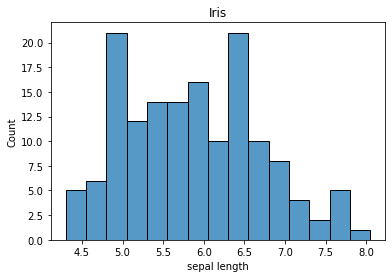

In [4]:
ax=sns.histplot(i_data['sepal length'],binwidth=0.25)
ax.set_title('Iris')

Text(0.5, 1.0, 'Iris')

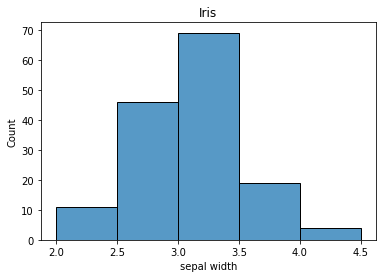

In [5]:
ax=sns.histplot(i_data['sepal width'],binwidth=0.5)
ax.set_title('Iris')

Text(0.5, 1.0, 'Iris')

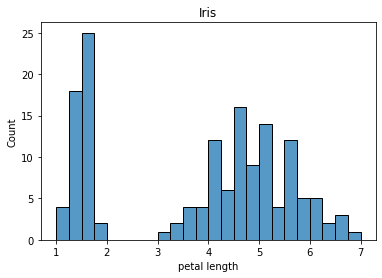

In [6]:
ax=sns.histplot(i_data['petal length'],binwidth=0.25)
ax.set_title('Iris')

Text(0.5, 1.0, 'Iris')

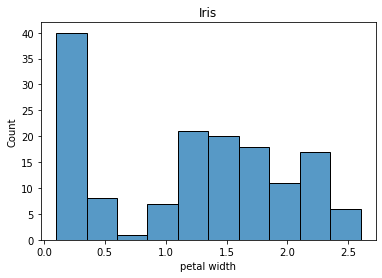

In [7]:
ax=sns.histplot(i_data['petal width'],binwidth=0.25)
ax.set_title('Iris')

# Data Preprocessing

In [4]:
le=LabelEncoder()
le.fit(i_data['class'])
i_data['class'] = le.transform(i_data['class'])

i_data.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [5]:
df=sklearn.utils.shuffle(i_data)
y=df['class'].values
x=df.drop(['class'],axis=1).values


In [6]:
import prettytable
table=prettytable.PrettyTable()
table.field_names=['Iris','Accuracy','Recall','Precision']

# Train-Test-Split

## Holdout validation

In [7]:
#Holdout validation with the ratio 7:3
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

nb = GaussianNB()
nb.fit(x_train, y_train)
print("Holdout validation accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Holdout validation accuracy: 97.78%


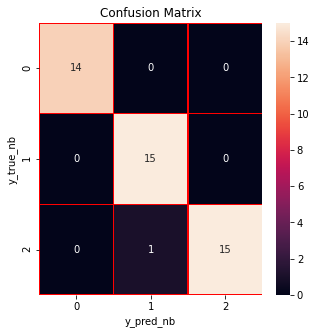

In [8]:
from sklearn import metrics
y_pred_nb = nb.predict(x_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.title("Confusion Matrix")
plt.show()

In [9]:
acc=round(accuracy_score(y_true_nb, y_pred_nb)*100,4)
recall=round(recall_score(y_true_nb, y_pred_nb,average='weighted')*100,4)
prec=round(precision_score(y_true_nb, y_pred_nb,average='weighted')*100,4)

table.add_row(["Holdout",acc,recall,prec])

## K-fold cross-validation

In [10]:
# K-fold cross-validation with 𝐾=3
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, random_state=None, shuffle=True)

matrix_list=list()
accuracies=[]
kf_acc=[]
kf_recall=[]
kf_prec=[]

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    nb.fit(x_train,y_train)
    matrix_list.append(confusion_matrix(y_test, nb.predict(x_test)))
    kf_acc=accuracy_score(y_test,nb.predict(x_test))
    kf_recall=recall_score(y_test,nb.predict(x_test),average='weighted')
    kf_prec=precision_score(y_test,nb.predict(x_test),average='weighted')
    
    accuracies=nb.score(x_test,y_test)

acc_avg=np.mean(accuracies)
print("K-fold cross-validation accuracy: {}%".format(round(acc_avg*100,2)))

matrix_list=np.average(np.array(matrix_list),axis=0)
#print(matrix_list.astype(np.int16))

[  0   1   2   3   4   6   7   8   9  10  11  16  17  18  19  20  21  22
  26  28  30  31  32  33  40  41  42  43  44  47  48  49  50  53  55  59
  61  62  63  64  67  68  70  71  72  73  74  75  77  78  83  85  86  87
  88  89  91  93  95  97  98  99 100 101 102 104 105 106 108 109 111 113
 114 115 116 117 118 120 121 123 124 125 126 127 128 130 131 132 133 134
 135 136 138 139 140 141 142 144 148] [  5  12  13  14  15  23  24  25  27  29  34  35  36  37  38  39  45  46
  51  52  54  56  57  58  60  65  66  69  76  79  80  81  82  84  90  92
  94  96 103 107 110 112 119 122 129 137 143 145 146 147]
[  0   1   5   7  10  11  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  29  30  32  33  34  35  36  37  38  39  40  42  44  45
  46  49  50  51  52  53  54  56  57  58  60  62  63  64  65  66  68  69
  74  75  76  77  79  80  81  82  84  85  89  90  91  92  93  94  96  99
 102 103 104 106 107 110 112 113 114 116 119 122 123 125 126 127 128 129
 131 137 138 139 143 144 145

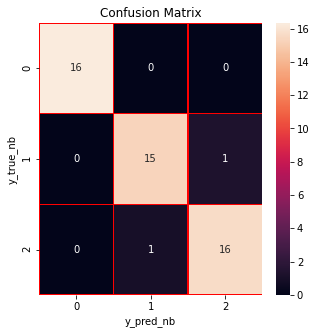

In [12]:
from sklearn import metrics
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(matrix_list,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.title("Confusion Matrix")
plt.show()

# Result


In [16]:
acc=round(np.mean(kf_acc)*100,4)
recall=round(np.mean(kf_recall)*100,4)
prec=round(np.mean(kf_prec)*100,4)

table.add_row(["Kfold ",acc,recall,prec])
print(table)

+---------+----------+---------+-----------+
|   Iris  | Accuracy |  Recall | Precision |
+---------+----------+---------+-----------+
| Holdout | 95.5556  | 95.5556 |  96.2393  |
|  Kfold  | 95.9184  | 95.9184 |  96.3719  |
+---------+----------+---------+-----------+


# Question

In [21]:
df=i_data
filt = (df['class'] == 'Iris-versicolor')
xi=df.loc[filt, ['petal length']]
print(xi)

print("𝜇 of 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour):", np.average(xi['petal length']))
print("𝜎 of 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour):", np.std(xi['petal length']))

    petal length
49           4.7
50           4.5
51           4.9
52           4.0
53           4.6
54           4.5
55           4.7
56           3.3
57           4.6
58           3.9
59           3.5
60           4.2
61           4.0
62           4.7
63           3.6
64           4.4
65           4.5
66           4.1
67           4.5
68           3.9
69           4.8
70           4.0
71           4.9
72           4.7
73           4.3
74           4.4
75           4.8
76           5.0
77           4.5
78           3.5
79           3.8
80           3.7
81           3.9
82           5.1
83           4.5
84           4.5
85           4.7
86           4.4
87           4.1
88           4.0
89           4.4
90           4.6
91           4.0
92           3.3
93           4.2
94           4.2
95           4.2
96           4.3
97           3.0
98           4.1
𝜇 of 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour): 4.26
𝜎 of 𝑃(𝑋𝑝𝑒𝑡𝑎𝑙_𝑙𝑒𝑛𝑔𝑡ℎ|𝑌=Iris Versicolour): 0.4651881339845204


<AxesSubplot:xlabel='petal length', ylabel='Density'>

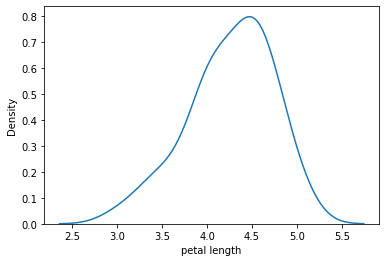

In [22]:
sns.kdeplot(xi['petal length'])